In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("/kaggle/input/ict-subdimension-dataset/ICT_Subdimension_Dataset.csv")

In [3]:
# Define city coordinates manually
city_coordinates = {
    "Mumbai": (19.0760, 72.8777), "Delhi": (28.7041, 77.1025), "Bangalore": (12.9716, 77.5946),
    "Hyderabad": (17.3850, 78.4867), "Ahmedabad": (23.0225, 72.5714), "Chennai": (13.0827, 80.2707),
    "Kolkata": (22.5726, 88.3639), "Pune": (18.5204, 73.8567), "Jaipur": (26.9124, 75.7873),
    "Surat": (21.1702, 72.8311), "Lucknow": (26.8467, 80.9462), "Kanpur": (26.4499, 80.3319),
    "Nagpur": (21.1458, 79.0882), "Indore": (22.7196, 75.8577), "Thane": (19.2183, 72.9781),
    "Bhopal": (23.2599, 77.4126), "Visakhapatnam": (17.6868, 83.2185), "Patna": (25.5941, 85.1376),
    "Vadodara": (22.3072, 73.1812), "Ghaziabad": (28.6692, 77.4538), "Ludhiana": (30.9009, 75.8573),
    "Agra": (27.1767, 78.0081), "Nashik": (19.9975, 73.7898), "Faridabad": (28.4089, 77.3178),
    "Meerut": (28.9845, 77.7064), "Rajkot": (22.3039, 70.8022), "Kalyan": (19.2437, 73.1355),
    "Vasai": (19.3919, 72.8397), "Varanasi": (25.3176, 82.9739), "Srinagar": (34.0837, 74.7973)
}


In [4]:
# Map latitude and longitude to dataset
df["Latitude"] = df["City"].map(lambda city: city_coordinates.get(city, (None, None))[0])
df["Longitude"] = df["City"].map(lambda city: city_coordinates.get(city, (None, None))[1])


In [5]:
# Handling Missing Data (MNAR - Missing Not At Random)
num_imputer = SimpleImputer(strategy='mean')   #replace missing values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns  #filters only columns' names with numbers
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])   #imputation applied

In [6]:
print("Summary Statistics:")
print(df[numeric_cols].describe())

Summary Statistics:
              Year  Household Internet Access (%)  \
count   180.000000                     180.000000   
mean   2021.500000                      72.998167   
std       1.712589                       8.984674   
min    2019.000000                      53.650000   
25%    2020.000000                      65.170000   
50%    2021.500000                      72.985000   
75%    2023.000000                      79.475000   
max    2024.000000                      92.630000   

       Fixed Broadband Subscriptions (%)  \
count                         180.000000   
mean                           45.900444   
std                             8.389596   
min                            23.970000   
25%                            39.640000   
50%                            46.685000   
75%                            52.575000   
max                            60.720000   

       Wireless Broadband Subscriptions (%)  \
count                            180.000000   
mean       

In [7]:
# Correlation Matrix
correlation_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                                                          Year  \
Year                                              1.000000e+00   
Household Internet Access (%)                     3.172532e-01   
Fixed Broadband Subscriptions (%)                 3.875601e-01   
Wireless Broadband Subscriptions (%)              5.070560e-01   
Wireless Broadband Coverage 3G (%)                5.526662e-01   
Wireless Broadband Coverage 4G (%)                9.716223e-01   
Smart Water Meters (%)                            6.144005e-01   
Smart Electricity Meters (%)                      5.392999e-01   
Dynamic Public Transport Information (%)          9.957146e-01   
Traffic Monitoring (%)                            9.959362e-01   
Availability of WIFI in Public Areas (count)     -1.558866e-02   
Water Supply ICT Monitoring (%)                   9.913149e-01   
Drainage / Storm Water System ICT Monitoring (%)  9.908241e-01   
Electricity Supply ICT Monitoring (%)             9.877

In [8]:
# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [9]:
# City-wise ICT Development Index (Simple Average of Selected Metrics)
df["ICT Development Index"] = df[numeric_cols].mean(axis=1)

# Temporal Analysis of ICT Growth
df_grouped = df.groupby("Year")[numeric_cols].mean()

# Print the results
print("City-wise ICT Development Index:")
print(df[["City", "ICT Development Index"]].head())

print("\nTemporal Analysis of ICT Growth:")
print(df_grouped.head())

City-wise ICT Development Index:
     City  ICT Development Index
0  Mumbai             135.148271
1  Mumbai             139.542557
2  Mumbai             141.923510
3  Mumbai             143.538271
4  Mumbai             145.872557

Temporal Analysis of ICT Growth:
          Year  Household Internet Access (%)  \
Year                                            
2019.0  2019.0                      68.954000   
2020.0  2020.0                      70.131000   
2021.0  2021.0                      72.251667   
2022.0  2022.0                      74.084000   
2023.0  2023.0                      75.628667   

        Fixed Broadband Subscriptions (%)  \
Year                                        
2019.0                          40.865000   
2020.0                          43.028667   
2021.0                          45.225667   
2022.0                          47.234000   
2023.0                          48.697000   

        Wireless Broadband Subscriptions (%)  \
Year                       

In [10]:
# 10 Visualizations
# 1. Box plot of ICT Development Index across cities
fig1 = px.box(df, x='City', y='ICT Development Index', title='ICT Development Index Across Cities')
fig1.show()

In [11]:
# 2. Line plot showing ICT growth over years
fig2 = px.line(df_grouped, x=df_grouped.index, y=df_grouped.columns, title='Temporal Trends in ICT Metrics')
fig2.show()


In [12]:
# 3. Scatter plot of Internet Access vs. E-Government
fig3 = px.scatter(df, x='Household Internet Access (%)', y='e-Government (%)', color='City', title='Internet Access vs. E-Government')
fig3.show()

In [13]:
# 4. Histogram of Broadband Subscriptions
fig4 = px.histogram(df, x='Fixed Broadband Subscriptions (%)', title='Distribution of Broadband Subscriptions')
fig4.show()


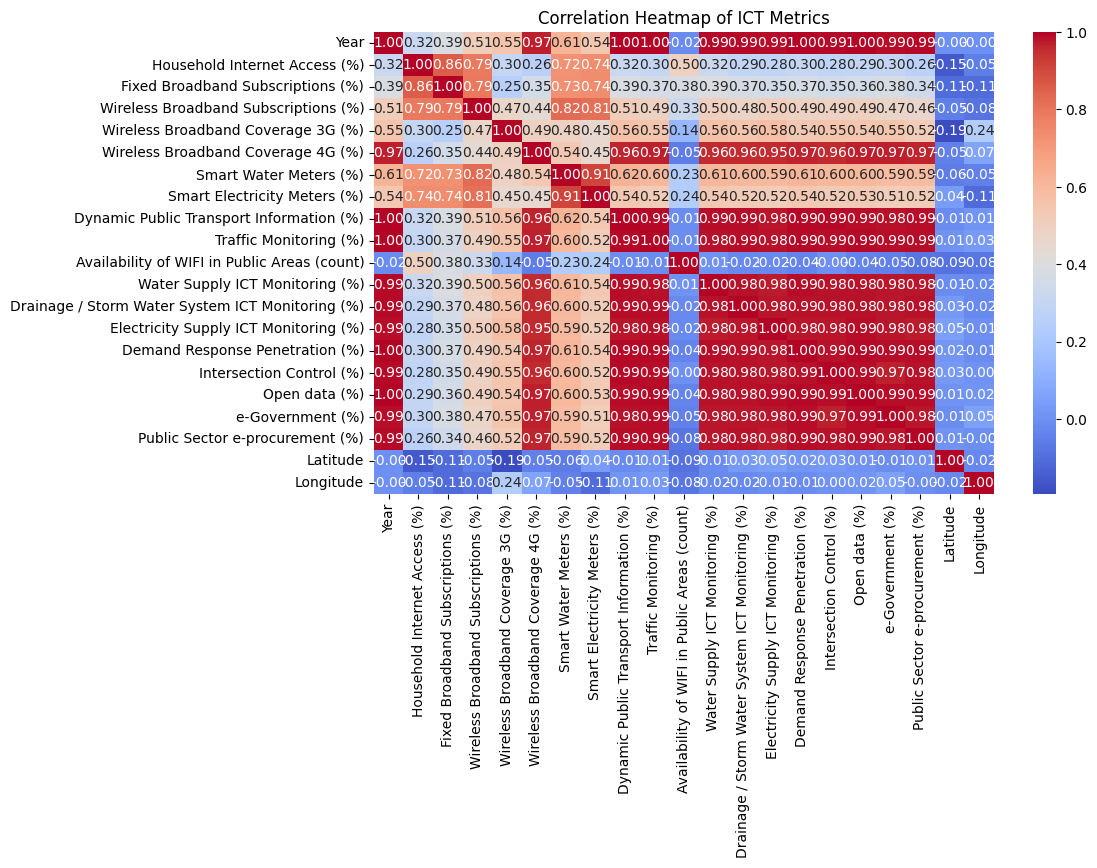

In [14]:
# 5. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of ICT Metrics")
plt.show()


In [15]:
# 6. Bar chart of Smart Electricity Meters by City
fig6 = px.bar(df, x='City', y='Smart Electricity Meters (%)', title='Smart Electricity Meter Adoption by City')
fig6.show()


In [16]:
# 7. Pie chart of Open Data Availability
fig7 = px.pie(df, values='Open data (%)', names='City', title='Open Data Availability Across Cities')
fig7.show()


In [17]:
# 8. Violin plot of Public Transport Information
fig8 = px.violin(df, x='City', y='Dynamic Public Transport Information (%)', box=True, title='Public Transport Information Access')
fig8.show()


In [18]:
# 9. Line plot showing Internet Access over time by city
fig9 = px.line(df, x='Year', y='Household Internet Access (%)', color='City', title='Household Internet Access Over Time')
fig9.show()


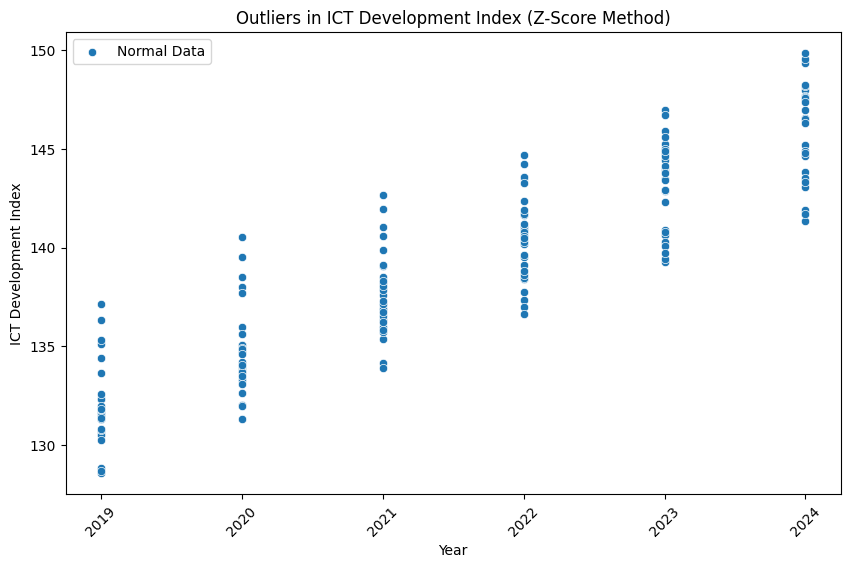

In [19]:
from scipy.stats import zscore

df["z_score"] = zscore(df["ICT Development Index"])  #how many sd each value is away from mean
outliers = df[df["z_score"].abs() > 2.5]  #adjust threshold (e.g., 3) for stricter detection

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["ICT Development Index"], label="Normal Data")
sns.scatterplot(x=outliers["Year"], y=outliers["ICT Development Index"], color="red", label="Outliers")
plt.xticks(rotation=45)
plt.title("Outliers in ICT Development Index (Z-Score Method)")
plt.legend()
plt.show()


## Decision tree model : 
The model identifies which ICT-related features (e.g., broadband subscriptions, smart meters, e-Government services) are most predictive of household internet access.

In [20]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Select relevant numerical features for clustering
features = [
    "Household Internet Access (%)", "Fixed Broadband Subscriptions (%)",
    "Wireless Broadband Subscriptions (%)", "Smart Water Meters (%)",
    "Smart Electricity Meters (%)", "Dynamic Public Transport Information (%)",
    "Traffic Monitoring (%)", "Open data (%)", "e-Government (%)"
]

In [22]:
# Decision Tree Regressor Model
X = df[features]
y = df["Household Internet Access (%)"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [23]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Decision Tree Regressor Model Performance:
Mean Squared Error: 0.22296388888888982
R-squared Score: 0.9971935067514602


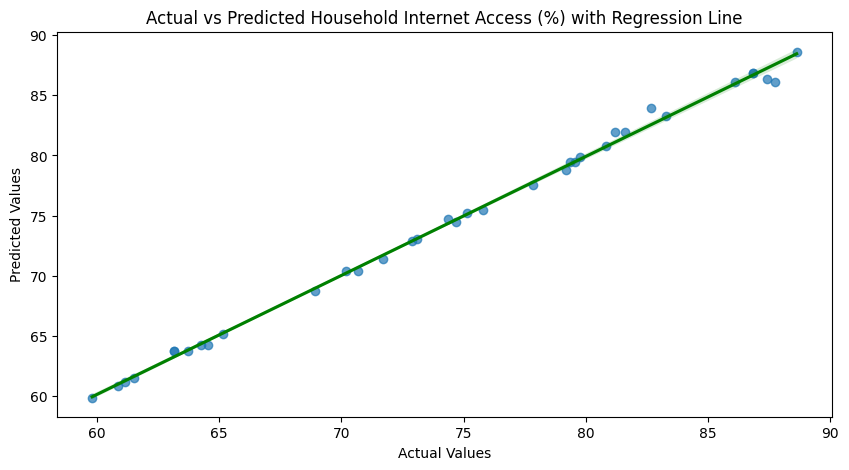

In [24]:
# Visualization of Actual vs Predicted values
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.7}, line_kws={"color": "green"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Household Internet Access (%) with Regression Line")
plt.show()
